# Project 1
### 8/10 perfect solutions required for full score

These exercises should be done on a computer using Python. 	Please submit a Jupyter-notebook, containing both your codes and the report in the same file. Provide properly commented codes.

Some of the tasks involve sparse matrices, to obtain efficient code it is preferable to work with sparse matrices using for example the library *sparse* of  *scipy*. In these exercises you are allowed to work with full matrices if you find it easier, but make sure that the comparisons of the various methods in your implementations, e.g. when comparing running times, are fair. Be explicit about these issues in your report.

**You will need an additional Python library for this exerise:** The library `autograd` will be used to compute the numerical Jacobian. It is not recommended to install this into the default annaconda environment, but instead create a seperate envirome

In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import Decimal as dec

ModuleNotFoundError: No module named 'Decimal'

## 1 - Propagation of rounding errors
The following exercise illustrates the effects of propagation of rounding errors in a numerical algorithm.

 
We want to make a programme to approximate the derivative of a differentiable function $f:\mathbb{R} \rightarrow \mathbb{R}$. We use the simple approximation

$$f'(x)=\frac{f(x+\Delta x)-f(x)}{\Delta x}+\mathcal{O}(\Delta x),\qquad f'(x)\approx \frac{f(x+\Delta x)-f(x)}{\Delta x}.$$

1. Use a Taylor expansion to prove that the error given by this approximation is indeed $\mathcal{O}(\Delta x)$. 



**Write your answer here ...**

We now take $f(x)=\exp(x)$, and use the formula above to approximate 

$$\left.\frac{d}{dx}\exp (x)\right|_{x=\frac{\pi}{4}}.$$

2. Make a simple Python programme to compute the absolute error committed by the approximation for decreasing values of $\Delta x$, e.g $\Delta x=\frac{1}{2^k}$ for $k=1,2,\dots , N$, choosing a value of $N$ between $30$ and $40$.
Plot the results (values of $\Delta x$ versus the corresponding absolute error) in a logarithmic scale.



In [ ]:
# Your code
import math
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x)

def estimated_derivative(x, d_x):
    return (f(x + d_x) - f(x))/d_x

x = math.pi / 4
deriv = np.exp(x)
N = 40

derivatives = [abs(estimated_derivative(x, 2**(-d_x)) - deriv) for d_x in range(N)]
plt.plot([k for k in range(N)], derivatives)
plt.grid()
plt.yscale("log")
plt.xlabel("2^-k")
plt.ylabel("absolute error")
plt.show()


You should see in your plot that for very small values of $\Delta x$ the error starts to increase, compromising the convergence of the approximation method. This is due to the propagation of rounding error. The results improve if we can compute our formulae with a higher precision.

3. In this exercise you should learn how to use the library `decimal` in Python in order to perform the calculations of the previous experiment with higher precision. 
Consider the same parameters used in the previous experiment ($\Delta x=\frac{1}{2^k}$ for $k=1,2,\dots , N$ and same $N$ as above), increase the level of precision (look up `getcontext().prec` in the `decimal` library) and produce a plot which does not show the effects of propagation of rounding errors.

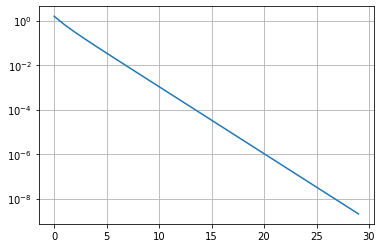

In [3]:
# Your code
from decimal import *

def f(x):
    return np.exp(Decimal(x))

def estimated_derivative(x, d_x):
    return Decimal(Decimal(f(Decimal(x) + Decimal(d_x))) - Decimal(f(Decimal(x))))/Decimal(d_x)

getcontext().prec = 100
x = math.pi / 4
N = 40

deriv = np.exp(Decimal(x))
derivatives = [abs(estimated_derivative(x, 2**(-d_x)) - deriv) for d_x in range(0, 30)]
plt.plot([k for k in range(0, 30)], derivatives)
plt.grid()
plt.yscale("log")
plt.show()


# 2 - Newton method

In this exercise, we will make use of the `autograd` package. As we have done at the start of this noteobook, when using this package, you must `import` Numpy using `autograd.numpy`. We use the `jacobian` function. Given a function $F:\mathbb{R}^n \to \mathbb{R}^n$, this outputs the function $\mathbb{R}^n \to \mathbb{R}^n, x\mapsto J x$, where $J$ is the Jacobian of $F$. See the following example.

In [4]:
from autograd import jacobian

def F(x):
    return np.array([x[0] + x[1], x[1]*x[0]])

# Computing the numerical Jacobian
DF = jacobian(F)
# Testing our function
x = np.array([3.0, 1.0])
F(x)

array([4., 3.])



1. You are given the following two functions:
$$
    F_1(x_1, x_2) = (x_1 - x_2 - 1, x_1^2 + x_2^2 - 4)
$$
$$
    F_2(x_1, x_2, x_3) = (4x_1^2 - x_2^2, 4x_1x_2^2 - 1, 3x_3 - 1)
$$
  - Using the package `autograd` for automatic differentiation to compute Jacobians, create a function `newton` which implements the Newton method for systems of nonlinear equations $F(\mathbf{x})=0$.
  - Apply the method to $F_1$ and $F_2$. These numerical experiments should give evidence that the Newton method converges for these two problems.
  - Choose an initial value close enough in norm to one solution of the system, and compute the norm of the difference between two consecutive iterates $\mathbf{x}^k$ and $\mathbf{x}^{k+1}$ to provide numerical evidence that your method converges. As an alternative way of measuring convergence consider the norm of $F(\mathbf{x}_k)$. Use the $\infty$-norm. Plot the values of $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}$ and $\|F(\mathbf{x}_k)\|_{\infty}$ for each iteration  $k=0,1,\dots, K-1$ where $K$ is the total number of iterations ($K$ is a number that you choose). Use a semi-logarithmic scale on the y-axis (semilog plot). Your answer is a figure with a few comments in text about what the picture shows and what is the problem you are solving.

In [8]:
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt

# Your Newton method implementation
def newton(F, x0, x, maxIter):
    '''
    Implements the Newton root finding method for systems of equations.
    
    --Parameters--
    F: function 
        N-array to N-array function
    x0: N-array
        Initial guess
    x: N-array
        actual solution
    maxIter: int
        Maximum number of iterations
    
    --Outputs--
    y: N-array
        Approximation to solution of F(y)=0
    '''

    norm_x = []
    norm_f = []
    y = x0
    for iter in range(maxIter):
        next_y = y + solve(jacobian(F)(y), -F(y).reshape((-1, 1))).reshape(x0.shape)
        norm_x.append(norm(next_y-y, ord=np.inf))
        norm_f.append(norm(F(y), ord=np.inf))
        y = next_y
        #print(y)
    print(norm_x)
    print(norm_f)
    plt.semilogy(range(maxIter), norm_x, label="||x_k+1 - x_k||")
    plt.semilogy(range(maxIter), norm_f, label="||F(x)||")
    plt.legend()
    plt.grid()
    plt.show()
    return y

[1.0, 0.16666666666666674, 0.01041666666666674, 4.101049868776574e-05, 6.356837278786998e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.0, 1.0, 0.05555555555555536, 0.00021701388888928363, 3.36372174558619e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


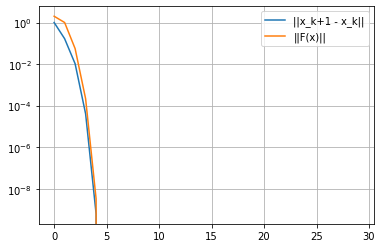

[1.82287566 0.82287566]
Solution: [1.82287566 0.82287566]
[0.6666666666666666, 0.15921409214092136, 0.0267854967708821, 0.000822340025505075, 4.3784670988866736e-07, 2.0594637106796654e-13, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16]
[3.0, 0.6666666666666662, 0.09929891819243375, 0.002841294372834313, 1.4491448032671883e-06, 6.858957846134217e-13, 2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 2.2

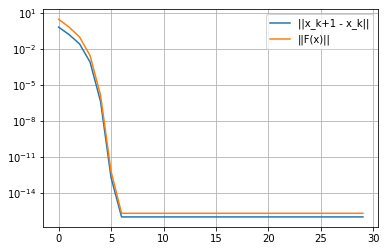

[0.39685026 0.79370053 0.33333333]
Solution: [0.39685026 0.79370053 0.33333333]


In [9]:
# Apply the method to your two functions
max_iter = 30
f1 = lambda x: np.array([x[0]-x[1]-1, x[0]**2 + x[1]**2 - 4]).astype('float64')
f1_sol = np.array([
    (1 + np.sqrt(7)) / 2,
    (-1 + np.sqrt(7)) / 2
]).astype('float64')
print(newton(f1, np.array([1, 1]).astype('float64'), f1_sol, max_iter))
print(f'Solution: {f1_sol}')

f2 = lambda x: np.array([4*x[0]**2 - x[1]**2, 4*x[0]*x[1]**2 - 1, 3*x[2] - 1]).astype('float64')
f2_sol = np.array([
    1 / (2*2**(1/3)),
    1 / (2**(1/3)),
    1 / 3
]).astype('float64')
print(newton(f2, np.array([1, 1, 1]).astype('float64'), f2_sol, max_iter))
print(f'Solution: {f2_sol}')

# TODO: Comment on graph.


2. Use the implemented Newton method and implement a stopping criterion.
As stopping criterion, you should use a maximum number of iterations as well as a tolerance $TOL$ such that the iteration is stopped whenever $\|F(\mathbf{x}^k)\|_{\infty}\le TOL$ and $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}\le TOL$. 
Provide numerical evidence that your code works as it should by  printing the values $\|F(\mathbf{x}^k)\|_{\infty}$ for each iteration , and making a plot of $\|F(\mathbf{x}^k)\|_{\infty}$, $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}$, for all $k$.



||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09


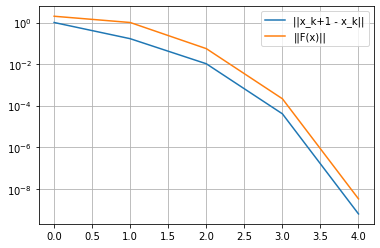

[1.82287566 0.82287566]
||F(x)||=3.0
||F(x)||=0.6666666666666662
||F(x)||=0.09929891819243375
||F(x)||=0.002841294372834313
||F(x)||=1.4491448032671883e-06
||F(x)||=6.858957846134217e-13


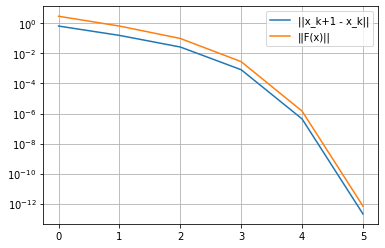

[0.39685026 0.79370053 0.33333333]


In [10]:
# Implement your method with a stopping criterion
def newton(F, x0, x, maxIter, TOL, display=True):
    '''
    Implements the Newton root finding method for systems of equations.
    
    --Parameters--
    F: function 
        N-array to N-array function
    x0: N-array
        Initial guess
    x: N-array
        actual solution
    maxIter: int
        Maximum number of iterations
    TOL: float
        Tolerance for error
    
    --Outputs--
    y: N-array
        Approximation to solution of F(y)=0
    '''

    norm_x = []
    norm_f = []
    y = x0
    stopped_iteration = -1
    for iter in range(maxIter):
        next_y = y + solve(jacobian(F)(y), -F(y).reshape((-1, 1))).reshape(x0.shape)
        norm_x.append(norm(next_y-y, ord=np.inf))
        norm_f.append(norm(F(y), ord=np.inf))
        print(f'||F(x)||={norm_f[-1]}')
        y = next_y
        if norm_x[-1] <= TOL and norm_f[-1] <= TOL:
            stopped_iteration = iter + 1
            break
    stopped_iteration = maxIter if stopped_iteration == -1 else stopped_iteration
    if display:
        plt.semilogy(range(stopped_iteration), norm_x, label="||x_k+1 - x_k||")
        plt.semilogy(range(stopped_iteration), norm_f, label="||F(x)||")
        plt.legend()
        plt.grid()
        plt.show()
    return y

TOL = 1e-8
print(newton(f1, np.array([1, 1]).astype('float64'), f1_sol, max_iter, TOL))
print(newton(f2, np.array([1, 1, 1]).astype('float64'), f2_sol, max_iter, TOL))

3. This question is open-ended meaning that there are many different ways to approach the question. 
Think of a good way of verifying numerically that the converegence of the Newton iteration is quadratic. 

**Hint**. You should consider a problem for which you know the solution or alternatively generate a reference solution (i.e. an approximation with very high accuracy). Use a converging iterative method with a very large number of iterations to obtain your reference solution. Use then the obtained reference solution in place of the exact solution for checking that the convergence indeed is *quadratic* or at *least quadratic*. Use the definition of quadratic convrgence.

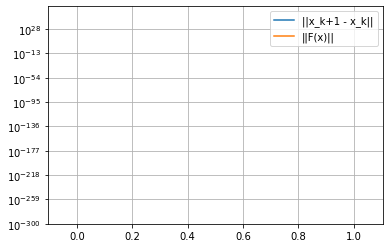

||F(x)||=2.0


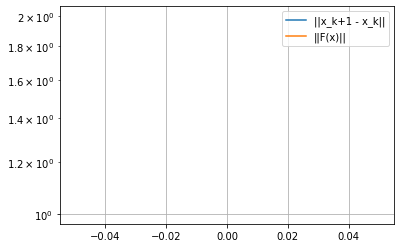

||F(x)||=2.0
||F(x)||=1.0


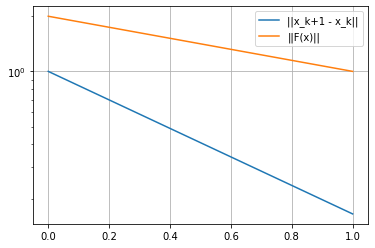

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536


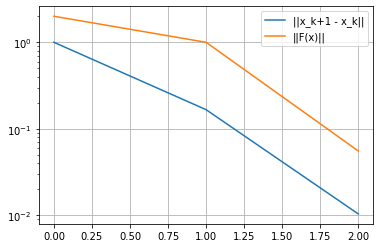

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363


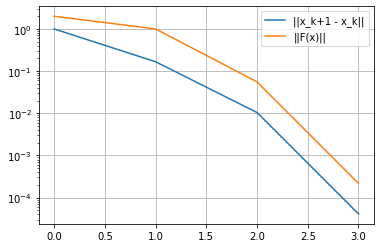

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09


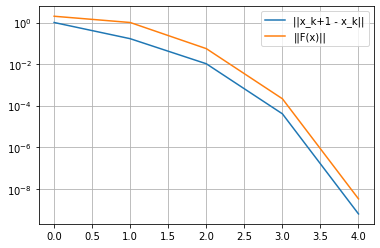

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


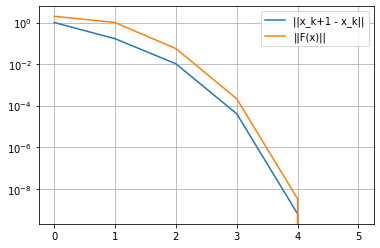

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


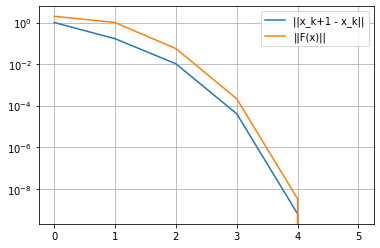

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


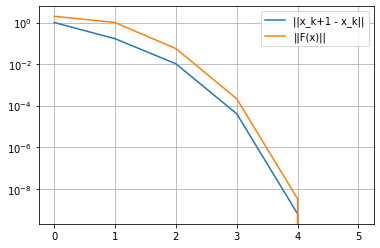

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


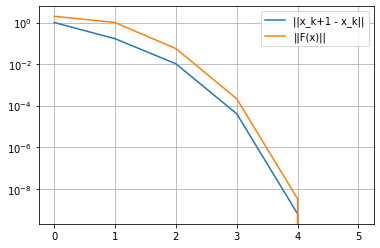

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


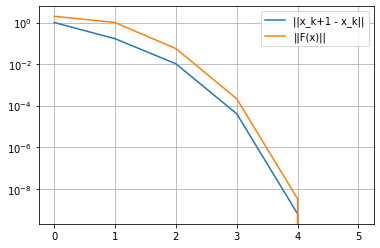

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


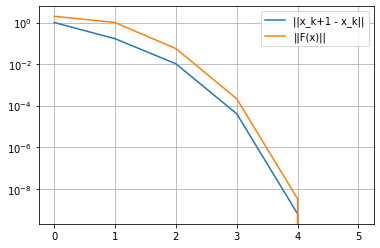

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


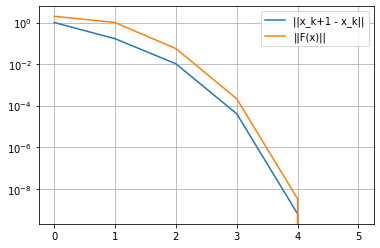

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


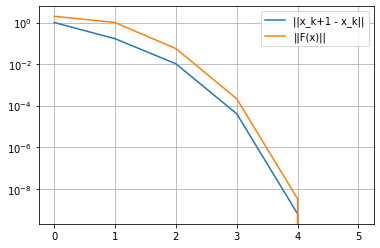

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


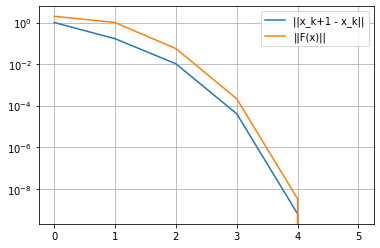

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


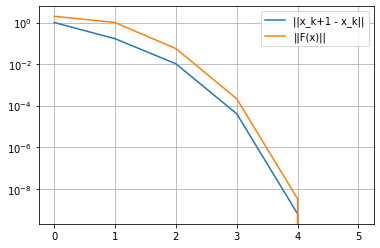

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


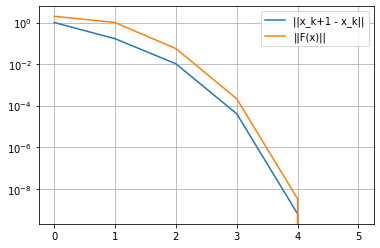

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


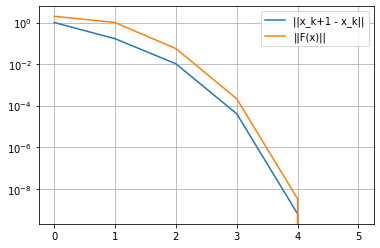

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


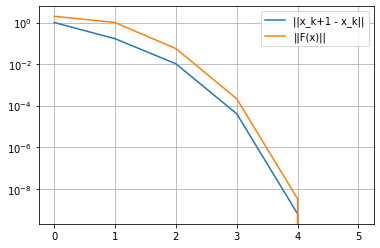

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


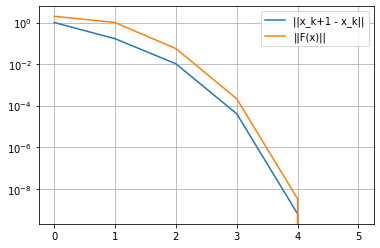

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


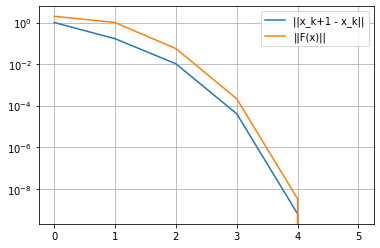

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


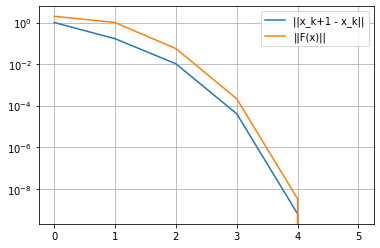

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


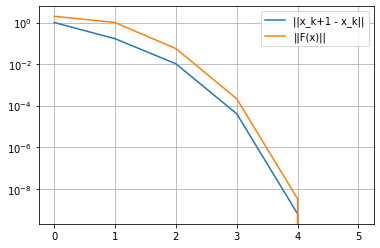

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


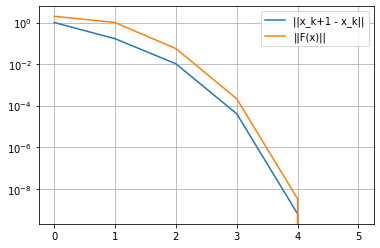

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


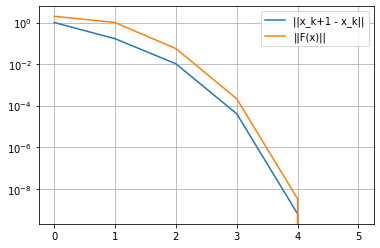

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


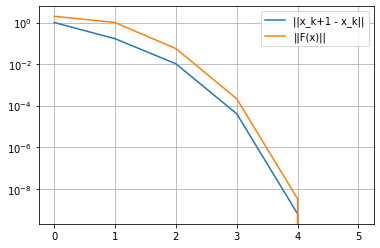

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


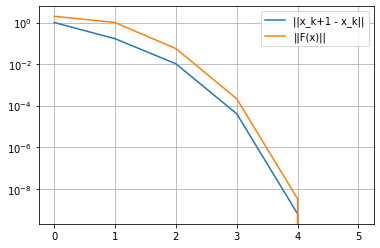

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


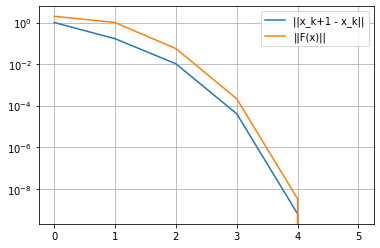

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


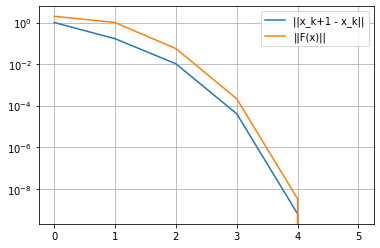

||F(x)||=2.0
||F(x)||=1.0
||F(x)||=0.05555555555555536
||F(x)||=0.00021701388888928363
||F(x)||=3.36372174558619e-09
||F(x)||=0.0


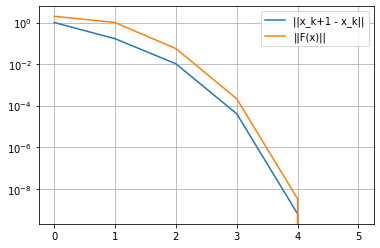

In [16]:
# Your code here
# TODO: Display quadratic error
max_iter = 30
# Could also just return a list of values for each of the iteratiosn of the netwon-method,
# but then I would have to rewrite the function.
iterations = [newton(f1, np.array([1, 1]).astype('float64'), f1_sol, it, 0) for it in range(max_iter)]



# 3 Linear systems

Consider the linear system 
	\begin{equation*}
	A \mathbf{u} = \mathbf{f},
	\end{equation*}
where $A$ is a finite-difference discretization of the 2D Laplacian, this is a block tridiagonal matrix, implemented in the code below, and $\mathbf{f}$ is the vector with all components equal to one.

In [ ]:
from scipy import sparse
from scipy import linalg

# Creating the 2D laplacian matrix.
nx, ny = 5, 5
N  = nx*ny
main_diag = np.ones(N)*-4.0
side_diag = np.ones(N-1)
side_diag[np.arange(1,N)%4==0] = 0
up_down_diag = np.ones(N-3)
diagonals = [main_diag,side_diag,side_diag,up_down_diag,up_down_diag]
laplacian = sparse.diags(diagonals, [0, -1, 1,nx,-nx])
print(laplacian*np.eye(N))
print(N)

For convenience, we introduce the following notation:

- $A_d$ the diagonal part of $A$,
- $A_l$ is **minus** the strictly lower-triangular part of $A$,
- $A_u$ is **minus** the strictly upper-triangular part of $A$,

with this notation, $A = A_d - A_l - A_u$.

We will now approximate the solution of this linear system using three different iterative methods of the type 
	\begin{equation*}
		M \mathbf{u}^{(k+1)} = N \mathbf{u}^{(k)}+\mathbf{f},
	\end{equation*}
	where $A = M - N$ with $|M|\ne0$. These methods are aslo known as splitting methods and  each choice of $M$ (and $N=M-A$) determines a different method. We will use the following three iterative methods to calculate approximate solutions to $\mathbf{u}$:

a) Jacobi ($M = A_d$).

b) Forward Gauss-Seidel ($M = A_d-A_l$).

c) Successive over relaxation ($M = A_d-\omega A_l$, where you can choose the value of $\omega$).

1. Create a function that implements the above method. This function should take as input the matrix `A` and `M`, and outputs the solution to the linear system `u`. Use the three methods mentioned above to find the solution to the linear system with `nx=ny=10` and `f` equal to the one vector. Confirm that what you obtain is indeed a solution.


In [ ]:
# Your Code - Create the function
def solveSystem(A, M, f, u0):
    '''
        Solves the system Au=f. 
        Takes as input the matrix A and function f, M which defines the method,
    and an initial guess u0.
        Outputs the solution u.
    '''
    N = M - A
    u = linalg.inv(M) @ N * u0 + linalg.inv(M) * f
    return u

In [ ]:
# Use your function to solve the problem with each of the methods.
# TODO: nx=ny=10?


2. Consider the residual vector $\mathbf{r}^k:=\mathbf{f}-A\mathbf{u}^k$. We wish to compare the speed of convergence for each of the methods above. 
   - Produce a semi-log plot of the  $2$-norm of the relative residual  $\frac{\|\mathbf{r}^k\|_2}{\|\mathbf{r}^0\|_2}$ versus the number of iterations. Plot all the methods in the same plot for comparison. 
   - Try choosing different values of $\omega$ in the SOR method, and try to find a value that gives you optimal convergence for this problem.

In [ ]:
# Your code


3. Implement a stopping criterion for the three methods. Then measure the relative time each method takes per iteration, and the time needed to guarantee that the norm of the relative residual is below tolerances $TOL=1e-7$ and $TOL=1e-14$. Use the function *time.time()* in Python.
Make a table containing the results for each method.



In [ ]:
from scipy.sparse.linalg import spsolve # Solver, similiar to the normal linalg.solve for sparse matrices
from scipy.sparse import csr_matrix

# Your Code


In [ ]:
# Make your table here


4. This exercise is open-ended. Calculate the spectral radius of $A_1^{-1}A_2$ and see how it relates to the convergence of the method (Hint: Python's `numpy.linalg.eigvals(A)` function returns the eigenvalues of $A$ ). Recall that there is a theorem that links the spectral radius of $A_1^{-1}A_2$ to the speed of convergence of the iteration. The theorem states that a spectral radius below $1$ is a necessary and sufficient condition for convergence independently on how $\mathbf{u}^0$ is chosen. In fact, the smaller the spectral radius the faster the convergence. Does this theorem reflect what happens in your example? How can you verify this with numerical experiments? 

In [ ]:
# Your Code
